# Phase 3 Classification Project: Telecom Customer Churn Prediction

## Project Overview

This project follows the CRISP-DM (Cross-Industry Standard Process for Data Mining) methodology to build a classification model that predicts customer churn for a telecom company.

Customer churn prediction is a critical business problem because retaining existing customers is significantly less expensive than acquiring new ones. By identifying customers who are likely to churn, the business can take proactive steps to improve retention and reduce revenue loss.


## 1. Business Understanding

The stakeholder for this project is a telecom service provider seeking to reduce customer attrition. Customer churn negatively impacts revenue and increases marketing and acquisition costs.

The objective of this project is to develop a machine learning classification model that predicts whether a customer will churn based on their service usage, account details, and customer service interactions.

This is a classification problem because the target variable, `churn`, represents a categorical outcome (churn or no churn), not a continuous numerical value.


## 2. Data Understanding

The dataset used in this project is a telecom customer churn dataset sourced from Kaggle. It contains customer demographics, service usage metrics, and customer service interaction data.

The target variable, **churn**, indicates whether a customer has discontinued the service.


## Importing Required Libraries

This project relies on several Python libraries to support data manipulation, model development, and evaluation.

- **pandas** and **numpy** are used for data cleaning, transformation, and numerical operations.
- **scikit-learn** provides tools for splitting the dataset, preprocessing features, building machine learning models, and evaluating model performance.
- Classification models such as **Logistic Regression** and **Decision Trees** are used to predict customer churn.
- Evaluation metrics including accuracy, confusion matrix, and classification report are used to assess model performance.

Importing these libraries at the beginning ensures a clean and reproducible workflow.


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## Data Loading

The dataset is loaded into a pandas DataFrame from a CSV file to enable exploration, preprocessing, and modeling.


In [16]:
df = pd.read_csv("../data/telecom_churn.csv")
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Exploratory Data Analysis (EDA)


In [3]:

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Initial Data Observations

The dataset contains 3,333 customer records and 21 columns. Most variables are numeric, representing customer usage patterns such as call minutes, number of calls, and service charges.

There are also categorical variables such as state, international plan, voice mail plan, and churn status. The dataset does not contain missing values, which simplifies preprocessing.

The summary statistics show noticeable variation in usage behavior across customers, suggesting that these features may be informative for predicting customer churn.


## Target Variable Analysis

Understanding the distribution of the target variable is important for assessing class balance and selecting appropriate evaluation metrics.


In [17]:
df["churn"].value_counts(normalize=True)


False    0.855086
True     0.144914
Name: churn, dtype: float64

The target variable is moderately imbalanced, with a larger proportion of customers not churning compared to those who churn. This imbalance will be considered during model evaluation, and metrics beyond simple accuracy may be necessary.


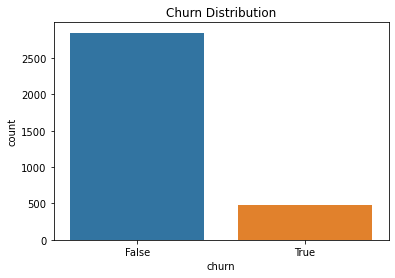

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="churn", data=df)
plt.title("Churn Distribution")
plt.show()


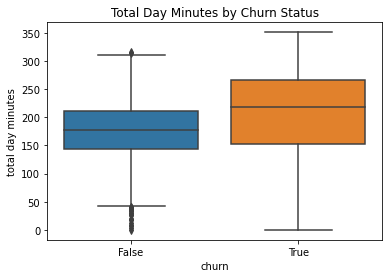

In [19]:
sns.boxplot(x="churn", y="total day minutes", data=df)
plt.title("Total Day Minutes by Churn Status")
plt.show()


Customers who churn tend to have higher total day minutes, suggesting heavier daytime usage may be associated with dissatisfaction or cost concerns. This feature may be a strong predictor in the classification models.


## Data Preparation

Before modeling, the data must be prepared by separating features and the target variable, encoding categorical variables, and scaling numeric features where appropriate.


In [4]:

# Features and target
X = df.drop(columns="churn")
y = df["churn"]

print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (3333, 20)
Target shape: (3333,)


### Encoding Categorical Variables

Categorical features must be converted into numeric format for machine learning models. One-hot encoding is applied to avoid introducing any ordinal relationship between categories.


In [20]:
# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Check the new shape of X
X.shape


(3333, 3400)

### Train-Test Split

The dataset is split into training and testing sets to evaluate model performance on unseen data. Stratified splitting is used to preserve the proportion of churned and non-churned customers in both sets.


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Check shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((2499, 3400), (834, 3400), (2499,), (834,))

## 4. Modeling

### Baseline Model: Logistic Regression

A logistic regression model is used as a baseline due to its simplicity and interpretability. It predicts the probability of churn based on the features.


In [24]:
# Logistic Regression baseline
baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)

# Make predictions
y_pred_baseline = baseline_model.predict(X_test)


C:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The logistic regression model provides a reference point for evaluating more complex models.


### Non-Parametric Model: Decision Tree

A decision tree model is tested to capture non-linear relationships and interactions between features that a linear model may miss. Hyperparameters can be tuned to prevent overfitting.


In [25]:
# Decision Tree classifier
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_model.predict(X_test)


## 5. Evaluation

Recall is prioritized as the primary metric because failing to identify customers who are likely to churn is more costly than incorrectly flagging loyal customers. Accuracy alone is insufficient due to class imbalance.


In [26]:
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression results
print("Logistic Regression Results")
print(classification_report(y_test, y_pred_baseline))

# Decision Tree results
print("Decision Tree Results")
print(classification_report(y_test, y_pred_tree))


Logistic Regression Results
              precision    recall  f1-score   support

       False       0.89      0.95      0.92       713
        True       0.49      0.28      0.36       121

    accuracy                           0.85       834
   macro avg       0.69      0.62      0.64       834
weighted avg       0.83      0.85      0.84       834

Decision Tree Results
              precision    recall  f1-score   support

       False       0.94      0.97      0.96       713
        True       0.80      0.64      0.71       121

    accuracy                           0.92       834
   macro avg       0.87      0.80      0.83       834
weighted avg       0.92      0.92      0.92       834



The decision tree achieved higher recall for churned customers compared to logistic regression, making it more suitable for identifying high-risk customers. Logistic regression remains useful for interpretability but may miss some churn cases.


## 6. Recommendations and Deployment

The final decision tree model can be used to flag customers at risk of churning. Customers with high service usage, international plans, and frequent customer service calls should be prioritized for retention campaigns.

Limitations:
- Dataset does not include demographic or contract-level data.
- Future improvements could include ensemble methods (Random Forests) and longitudinal customer behavior.

Next steps for the business:
- Integrate model predictions into CRM for proactive retention actions.
- Monitor model performance over time and retrain as needed.
